In [23]:
import pandas as pd
import numpy as np
#import librosa
import statsmodels.formula.api as sm
from statsmodels.api import add_constant
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
from scipy.stats import randint

In [2]:
%pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [24]:

# Load the data splits
train_data = pd.read_csv('../mcats/data/train_data.csv')
val_data = pd.read_csv('../mcats/data/test_data.csv')
test_data = pd.read_csv('../mcats/data/val_data.csv')

# Split the data into X and y
X_train = train_data.iloc[:, 1:-1]
y_train = train_data.iloc[:, -1]
X_val = val_data.iloc[:, 1:-1]
y_val = val_data.iloc[:, -1]
X_test = test_data.iloc[:, 1:-1]
y_test = test_data.iloc[:, -1]

In [4]:
model = LogisticRegression(max_iter=1000)
# random grid search mess around with penalties, C, and solver. If not good try different feature engineering.


cv_results = cross_validate(model, X_train, y_train, cv=5)

accuracy = cv_results['test_score'].mean()
accuracy

0.7246458923512747

In [5]:
model.fit(X_train, y_train)
preds = model.predict(X_train)
#y_ true is y_test  predict on x_text  y_pred is the output of the model
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.81      0.80      0.80       477
   classical       0.94      0.94      0.94       437
         pop       0.66      0.61      0.64       423
  electronic       0.75      0.75      0.75       424
       metal       0.76      0.81      0.79       443
        rock       0.71      0.68      0.69       450
     country       0.71      0.74      0.72       419
      reggae       0.80      0.79      0.80       457

    accuracy                           0.77      3530
   macro avg       0.77      0.77      0.77      3530
weighted avg       0.77      0.77      0.77      3530



In [6]:
model.fit(X_train, y_train)
preds = model.predict(X_test)
#y_ true is y_test  predict on x_text  y_pred is the output of the model
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.53      0.66      0.59       140
   classical       0.86      0.85      0.85       172
         pop       0.34      0.27      0.30       164
  electronic       0.46      0.45      0.45       148
       metal       0.57      0.59      0.58       122
        rock       0.41      0.39      0.40       154
     country       0.38      0.39      0.39       119
      reggae       0.62      0.63      0.62       155

    accuracy                           0.53      1174
   macro avg       0.52      0.53      0.52      1174
weighted avg       0.53      0.53      0.53      1174



In [7]:
model = LogisticRegression(n_jobs =-1)  
model_parameters = { 'penalty':['l1', 'l2', 'elasticnet', None],
                    'C': randint(0,5),
                    'solver':['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], 
                   }
random_search= RandomizedSearchCV(model, model_parameters, n_iter=100, cv=5, random_state=1, verbose=2)

model =random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ......................C=3, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=3, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=3, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=3, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=3, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .....................C=1, penalty=None, solver=saga; total time=   1.9s
[CV] END .....................C=1, penalty=None, solver=saga; total time=   1.5s
[CV] END .....................C=1, penalty=None, solver=saga; total time=   1.5s
[CV] END .....................C=1, penalty=None, solver=saga; total time=   1.5s
[CV] END .....................C=1, penalty=None, solver=saga; total time=   1.5s
[CV] END ..................C=0, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..................C=0, penalty=l1, so

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   1.2s
[CV] END ..........C=4, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=4, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=4, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=4, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..........C=4, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END .......................C=2, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......................C=2, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......................C=2, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......................C=2, penalty=l1, solver=saga; total time=   1.7s
[CV] END .......................C=2, penalty=l1, solver=saga; total time=   1.8s
[CV] END ............C=2, penalty=l1, solver=newton-cholesky; total time=   0.0s
[CV] END ............C=2, pe

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=2, penalty=l1, solver=liblinear; total time=   6.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=2, penalty=l1, solver=liblinear; total time=   5.8s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=2, penalty=l1, solver=liblinear; total time=   5.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=2, penalty=l1, solver=liblinear; total time=   6.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=2, penalty=l1, solver=liblinear; total time=   6.3s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   1.2s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   1.2s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   1.2s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   1.2s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   1.2s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   1.2s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   1.2s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   1.2s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   1.2s
[CV] END .......................C=1, penalty=l2, solver=saga; total time=   1.2s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   1.2s
[CV] END ...................

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=4, penalty=l1, solver=liblinear; total time=   6.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=4, penalty=l1, solver=liblinear; total time=   6.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=4, penalty=l1, solver=liblinear; total time=   7.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=4, penalty=l1, solver=liblinear; total time=   7.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=4, penalty=l1, solver=liblinear; total time=   6.7s
[CV] END ..................C=3, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=3, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=3, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=3, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=3, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......................C=4, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......................C=4, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......................C=4, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......................C=4, penalty=l1, solver=saga; total time=   1.9s
[CV] END .......................C=4, penalty=l1, solver=saga; total time=   1.9s
[CV] END ..................C=3, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END ..................C

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=2, penalty=None, solver=newton-cg; total time=   1.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=2, penalty=None, solver=newton-cg; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=2, penalty=None, solver=newton-cg; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=2, penalty=None, solver=newton-cg; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=2, penalty=None, solver=newton-cg; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   3.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   3.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   3.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   4.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(


[CV] END ..................C=1, penalty=l1, solver=liblinear; total time=   4.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=3, penalty=None, solver=saga; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=3, penalty=None, solver=saga; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=3, penalty=None, solver=saga; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=3, penalty=None, solver=saga; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=3, penalty=None, solver=saga; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   1.3s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   1.2s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   1.2s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   1.2s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   1.2s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   1.2s
[CV] END ..........C=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=0, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=1, penalty=None, solver=newton-cholesky; total time=   0.2s
[CV] END ..........C=1, pena

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=4, penalty=None, solver=saga; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=3, penalty=None, solver=saga; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=3, penalty=None, solver=saga; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=3, penalty=None, solver=saga; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=3, penalty=None, solver=saga; total time=   1.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END .....................C=3, penalty=None, solver=saga; total time=   1.3s
[CV] END ......................C=0, penalty=None, solver=sag; total time=   0.0s
[CV] END ......................C=0, penalty=None, solver=sag; total time=   0.0s
[CV] END ......................C=0, penalty=None, solver=sag; total time=   0.0s
[CV] END ......................C=0, penalty=None, solver=sag; total time=   0.0s
[CV] END ......................C=0, penalty=None, solver=sag; total time=   0.0s
[CV] END ........................C=3, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........................C=3, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........................C=3, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........................C=3, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........................C=3, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......................C=4, penalty=l2, solver=lbfgs; total time=   1.2s
[CV] END ...................

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......................C=2, penalty=None, solver=sag; total time=   0.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......................C=2, penalty=None, solver=sag; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......................C=2, penalty=None, solver=sag; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......................C=2, penalty=None, solver=sag; total time=   1.1s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......................C=2, penalty=None, solver=sag; total time=   1.1s
[CV] END ................C=1, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ................C=1, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ................C=1, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ................C=1, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ................C=1, penalty=None, solver=liblinear; total time=   0.0s
[CV] END ................C=0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ................C=0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ................C=0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ................C=0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ................C=0, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ........................C=4, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...................

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/

[CV] END ..................C=3, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END ..................C=3, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END ..................C=3, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END ..................C=3, penalty=l2, solver=newton-cg; total time=   0.8s
[CV] END ..................C=3, penalty=l2, solver=newton-cg; total time=   0.7s
[CV] END ..................C=4, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=4, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=4, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=4, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..................C=4, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..............C=2, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=2, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..............C=2, 

[CV] END .......................C=3, penalty=l2, solver=saga; total time=   1.3s
[CV] END .......................C=3, penalty=l2, solver=saga; total time=   1.3s
[CV] END .......................C=3, penalty=l2, solver=saga; total time=   1.3s
[CV] END .......................C=3, penalty=l2, solver=saga; total time=   1.3s
[CV] END .......................C=3, penalty=l2, solver=saga; total time=   1.3s
[CV] END ................C=1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ................C=1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ................C=1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ................C=1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ................C=1, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ......................C=3, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=3, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...................

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=4, penalty=None, solver=newton-cg; total time=   2.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=4, penalty=None, solver=newton-cg; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=4, penalty=None, solver=newton-cg; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=4, penalty=None, solver=newton-cg; total time=   1.6s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=4, penalty=None, solver=newton-cg; total time=   1.4s
[CV] END ..........C=4, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=4, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=4, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=4, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=4, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ............C=0, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ............C=0, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ............C=0, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ............C=0, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ............C=0, penalty=l2, solver=newton-cholesky; total time=   0.0s
[CV] END ........................C=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...................

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty

[CV] END ..........C=3, penalty=None, solver=newton-cholesky; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..........C=3, penalty=None, solver=newton-cholesky; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..........C=3, penalty=None, solver=newton-cholesky; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..........C=3, penalty=None, solver=newton-cholesky; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..........C=3, penalty=None, solver=newton-cholesky; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..........C=2, penalty=None, solver=newton-cholesky; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..........C=2, penalty=None, solver=newton-cholesky; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..........C=2, penalty=None, solver=newton-cholesky; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..........C=2, penalty=None, solver=newton-cholesky; total time=   0.3s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ..........C=2, penalty=None, solver=newton-cholesky; total time=   0.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=4, penalty=None, solver=newton-cg; total time=   2.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=4, penalty=None, solver=newton-cg; total time=   1.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=4, penalty=None, solver=newton-cg; total time=   1.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=4, penalty=None, solver=newton-cg; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ................C=4, penalty=None, solver=newton-cg; total time=   1.5s
[CV] END ......................C=4, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=4, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=4, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=4, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......................C=4, penalty=l1, solver=lbfgs; total time=   0.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....................C=3, penalty=None, solver=lbfgs; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....................C=3, penalty=None, solver=lbfgs; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....................C=3, penalty=None, solver=lbfgs; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....................C=3, penalty=None, solver=lbfgs; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....................C=3, penalty=None, solver=lbfgs; total time=   1.2s
[CV] END .......................C=3, penalty=l2, solver=saga; total time=   1.1s
[CV] END .......................C=3, penalty=l2, solver=saga; total time=   1.3s
[CV] END .......................C=3, penalty=l2, solver=saga; total time=   1.3s
[CV] END .......................C=3, penalty=l2, solver=saga; total time=   1.3s
[CV] END .......................C=3, penalty=l2, solver=saga; total time=   1.3s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   1.2s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   1.2s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   1.2s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   1.3s
[CV] END ....................C=1, penalty=None, solver=lbfgs; total time=   1.2s
[CV] END ..........C=2, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..........C=2, pena

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......................C=2, penalty=None, solver=sag; total time=   1.9s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......................C=2, penalty=None, solver=sag; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......................C=2, penalty=None, solver=sag; total time=   1.5s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......................C=2, penalty=None, solver=sag; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ......................C=2, penalty=None, solver=sag; total time=   1.4s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....................C=4, penalty=None, solver=lbfgs; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....................C=4, penalty=None, solver=lbfgs; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....................C=4, penalty=None, solver=lbfgs; total time=   0.7s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....................C=4, penalty=None, solver=lbfgs; total time=   1.2s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV] END ....................C=4, penalty=None, solver=lbfgs; total time=   1.2s
[CV] END ........................C=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........................C=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........................C=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........................C=0, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........................C=0, penalty=l1, solver=sag; total time=   0.0s


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
295 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/s

In [8]:
random_search.best_params_

{'C': 2, 'penalty': None, 'solver': 'newton-cg'}

In [9]:
model_1 = LogisticRegression(max_iter=1000, C= 2, penalty = None, solver ='newton-cg')
model_1.fit(X_train, y_train)
preds = model_1.predict(X_train)
#y_ true is y_test  predict on x_text  y_pred is the output of the model
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


              precision    recall  f1-score   support

      hiphop       0.81      0.81      0.81       477
   classical       0.94      0.95      0.95       437
         pop       0.66      0.62      0.64       423
  electronic       0.73      0.74      0.73       424
       metal       0.77      0.82      0.79       443
        rock       0.72      0.69      0.71       450
     country       0.72      0.73      0.73       419
      reggae       0.80      0.81      0.80       457

    accuracy                           0.77      3530
   macro avg       0.77      0.77      0.77      3530
weighted avg       0.77      0.77      0.77      3530



In [10]:
model_1 = LogisticRegression(C= 2, penalty = None, solver ='newton-cg')
model_1.fit(X_train, y_train)
preds = model_1.predict(X_test)
#y_ true is y_test  predict on x_text  y_pred is the output of the model
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


              precision    recall  f1-score   support

      hiphop       0.54      0.65      0.59       140
   classical       0.81      0.85      0.83       172
         pop       0.30      0.23      0.26       164
  electronic       0.46      0.45      0.46       148
       metal       0.56      0.58      0.57       122
        rock       0.41      0.40      0.41       154
     country       0.41      0.39      0.40       119
      reggae       0.60      0.63      0.61       155

    accuracy                           0.53      1174
   macro avg       0.51      0.52      0.52      1174
weighted avg       0.52      0.53      0.52      1174



In [11]:
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[("pca", pca), ("logistic", logistic)])
param_grid = {
    "pca__n_components": [5, 15, 30, 45, 60],
    "logistic__C": np.logspace(-4, 4, 4),
    
}
search = GridSearchCV(pipe, param_grid, n_jobs=2)
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)


/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/s

Best parameter (CV score=0.682):
{'logistic__C': 10000.0, 'pca__n_components': 60}


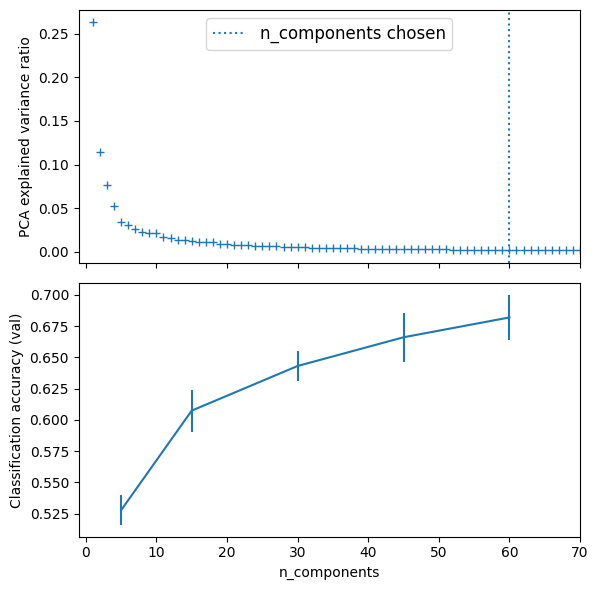

In [12]:
# Plot the PCA spectrum
pca.fit(X_train)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(
    np.arange(1, pca.n_components_ + 1), pca.explained_variance_ratio_, "+", linewidth=2
)
ax0.set_ylabel("PCA explained variance ratio")

ax0.axvline(
    search.best_estimator_.named_steps["pca"].n_components,
    linestyle=":",
    label="n_components chosen",
)
ax0.legend(prop=dict(size=12))

# For each number of components, find the best classifier results
results = pd.DataFrame(search.cv_results_)
components_col = "param_pca__n_components"
best_clfs = results.groupby(components_col).apply(
    lambda g: g.nlargest(1, "mean_test_score")
)

best_clfs.plot(
    x=components_col, y="mean_test_score", yerr="std_test_score", legend=False, ax=ax1
)
ax1.set_ylabel("Classification accuracy (val)")
ax1.set_xlabel("n_components")

plt.xlim(-1, 70)

plt.tight_layout()
plt.show()

In [13]:

pca = PCA()
pca.fit(X_train)

#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#Find number of components that explain predefined variance threshold
sum_variance, component_count = 0, 0
while sum_variance < 0.85:
    sum_variance += pca.explained_variance_ratio_[component_count]
    component_count += 1
    
print('Number of Principal Components that explain >=85% of Variance: ', component_count)
print('Total Variance Explained by '+str(component_count)+' components:', str(sum_variance*100)+'%')

Number of Principal Components that explain >=85% of Variance:  29
Total Variance Explained by 29 components: 85.3461126300248%


In [25]:
#Create and fit PCA object

component_count = 29
pca = PCA(n_components=component_count)
pca.fit(X_train)

#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#Training
model = LogisticRegression(max_iter=1000, C= 2, penalty = None, solver ='newton-cg').fit(X_train_pca, y_train)


#Predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Training Set Accuracy: 65.21246458923513%
Testing Set Accuracy: 52.55536626916525%


In [15]:
component_count = 60
pca = PCA(n_components=component_count)
pca.fit(X_train)
#Transforming x_train and x_test 
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)


#Training
model = LogisticRegression(max_iter=1000, C= 2, penalty = None, solver ='newton-cg').fit(X_train_pca, y_train)


#Predict
y_pred_train = model.predict(X_train_pca)
y_pred_test = model.predict(X_test_pca)

#Performance Evaluation
train_score = accuracy_score(y_train, y_pred_train)*100
test_score = accuracy_score(y_test, y_pred_test)*100

print("Training Set Accuracy:",str(train_score)+'%')
print("Testing Set Accuracy:",str(test_score)+'%')

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Training Set Accuracy: 70.1699716713881%
Testing Set Accuracy: 51.70357751277683%


In [16]:

preds = y_pred_train
#y_ true is y_test  predict on x_text  y_pred is the output of the model
y_true = y_train
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.72      0.76      0.74       477
   classical       0.89      0.91      0.90       437
         pop       0.59      0.52      0.55       423
  electronic       0.70      0.72      0.71       424
       metal       0.72      0.76      0.74       443
        rock       0.61      0.60      0.61       450
     country       0.63      0.61      0.62       419
      reggae       0.72      0.73      0.72       457

    accuracy                           0.70      3530
   macro avg       0.70      0.70      0.70      3530
weighted avg       0.70      0.70      0.70      3530



In [17]:
preds = y_pred_test
#y_ true is y_test  predict on x_text  y_pred is the output of the model
y_true = y_test
y_pred = preds
target_names = ['hiphop','classical','pop','electronic','metal', 'rock','country','reggae']
print(classification_report(y_true, y_pred, target_names=target_names))

              precision    recall  f1-score   support

      hiphop       0.52      0.62      0.57       140
   classical       0.81      0.84      0.83       172
         pop       0.40      0.35      0.38       164
  electronic       0.41      0.36      0.39       148
       metal       0.56      0.57      0.56       122
        rock       0.38      0.35      0.36       154
     country       0.31      0.34      0.33       119
      reggae       0.64      0.64      0.64       155

    accuracy                           0.52      1174
   macro avg       0.50      0.51      0.51      1174
weighted avg       0.51      0.52      0.51      1174



In [18]:
file_path = '../mcats/data/'
def normalize_volume_mp3(file_path):
    audio, sr = librosa.load(file_path, offset=30.0, duration=30.0)
    audio_norm = librosa.util.normalize(audio, axis=0)
    return audio_norm, sr
def extract_features(y_norm, sr):

    features = []

    # Tempo and beats
    tempo, beats = librosa.beat.beat_track(y=y_norm, sr=sr)
    beats_mean = beats.mean()
    beats_var = beats.var()
    features.extend((tempo, beats_mean, beats_var))

    # Zero crossings
    zero_crossings = librosa.zero_crossings(y=y_norm, pad=False)
    zero_crossings_mean = zero_crossings.mean()
    zero_crossings_var = zero_crossings.var()
    features.extend((zero_crossings_mean, zero_crossings_var))

    # Spectral centroid
    spectral_centroids = librosa.feature.spectral_centroid(y=y_norm, sr=sr)[0]
    spectral_centroids_mean = spectral_centroids.mean()
    spectral_centroids_var = spectral_centroids.var()
    features.extend((spectral_centroids_mean,spectral_centroids_var))

    # Specral Rolloff
    spectral_rolloff = librosa.feature.spectral_rolloff(y=y_norm, sr=sr)[0]
    spectral_rolloff_mean = spectral_rolloff.mean()
    spectral_rolloff_var = spectral_rolloff.var()
    features.extend((spectral_rolloff_mean, spectral_rolloff_var))

    # MFCCs
    mfccs = librosa.feature.mfcc(y=y_norm, sr=sr, n_mfcc=40)
    for mfcc in mfccs:
        features.append(mfcc.mean())
        features.append(mfcc.var())

    return features

number_to_genre = {0: 'hiphop',
                1: 'classical',
                2: 'pop',
                3: 'electronic',
                4: 'metal',
                5: 'rock',
                6: 'country',
                7: 'reggae'}


In [19]:
def predict_genre(file_path, model):
    columns = ['tempo', 'beats_mean', 'beats_var', 
        'zero_crossings_mean', 'zero_crossings_var',
        'spectral_centroids_mean', 'spectral_centroids_var', 'spectral_rolloff_mean',
        'spectral_rolloff_var']
    for i in range(40):
        columns.extend((f'mfcc_{i+1}_mean', f'mfcc_{i+1}_var'))
    audio, sr = normalize_volume_mp3(file_path)
    audio_features = np.array(extract_features(audio, sr)).reshape(1,-1)
    audio_features = pd.DataFrame(audio_features, columns=columns)
    audio_features_norm = pd.DataFrame(scaler.transform(audio_features), columns=columns)
    prediction = model.predict(audio_features_norm)[0]
    
    return number_to_genre[prediction]

In [20]:
import pickle
with open('../mcats/data/scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

/root/.pyenv/versions/3.8.12/envs/mcats/lib/python3.8/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.3 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [21]:
predict_genre(file_path, model)

NameError: name 'librosa' is not defined